# IMDb Movie Data Analysis

## Introduction
**Objective**: <br>
This project analyzes IMDb movie data (1916-2015) to explore trends, relationships, and patterns across key features: genres, budgets, revenues, popularity, and voting averages.

**Focus**: <br>
Answering research questions about genre popularity, financial performance, and movie ratings, while testing hypotheses on factors influencing movie success.
> **Research Questions**:
  1. What are the most common genres based on the number of movies made?
  2. Which genres have the highest average budget, revenue, and profit?
  3. Which genres are the most popular on average?

> **Research Hypotheses**:
  1. Popular movies result in higher profit and revenue.
  2. Larger budgets lead to higher revenue and profit.
  3. Larger budgets are associated with greater popularity.

**Workflow**: <br>
Initial exploration, data cleaning/preprocessing, EDA, and visualizations to uncover insights about the movie industry over a century

## Table of Content
1. Initial Exploration
2. Data Cleaning & Pre-Processing
3. Research Questions
4. Research Hypotheses
5. Closing Analysis


In [ ]:
# Setup
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Importing dataset
movies = pd.read_csv('/content/imdb_movies.csv')

## 1. Initial Exploration
**Purpose**: Assess the raw dataset to:
- Understand its structure
- Identify key features
- Determine necessary data cleaning and preprocessing steps

In [ ]:
# Displaying a preview of the dataset
movies.head(3)

# Notes:
  # Genres formated interestingly ("Action|Adventure|Science|Fiction"); Will need to transform column to be ready for analysis/visualization
  # Will need to drop unused columns with text strings to save space and speed up execution

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [ ]:
# Displaying dataset structure and summary
movies.info()

# Notes:
  # 'release_date' is in object format; will need to convert to datetime for time-based analysis
  # 8 columns have null values
  # No 'profit' column present; will need to create one for financial analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [ ]:
# Checking for null values in each column
movies.isnull().sum()

# Notes:
  # Must address null values in 'genres' as it is critical for answering research questions
  # Will remove rows where 'genres' is null to ensure complete data for analysis (23 null rows out of 10,866 rows)
  # Null values in other columns can remain as they are not essential for this analysis

,0
id,0
imdb_id,10
popularity,0
budget,0
revenue,0
original_title,0
cast,76
homepage,7930
director,44
tagline,2824


In [ ]:
# Counting movies per release year and sorting by year in ascending order
movies['release_year'].value_counts().sort_index(ascending=True)

# Notes:
  # Dataset spans 55 years, from 1960 to 2015
  # Shows an increasing number of movies recorded over time

,count
release_year,
1960,32
1961,31
1962,32
1963,34
1964,42
1965,35
1966,46
1967,40
1968,39


In [ ]:
# Checking for duplicate rows in the dataset
movies[movies.duplicated()]

# Notes:
  # Found one duplicate row in the dataset; will remove it to maintain data integrity

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [ ]:
# Displaying descriptive statistics
pd.set_option('display.float_format', '{:.2f}'.format)
movies.describe()

# Notes:
  # Popularity: range = 0 to 33; median = 0.38 (most movies have low popularity)
  # Vote Count: range = 10 to 9,767; median = 38 (most movies have a low number of votes)
  # Vote Average: range = 1.5 to 9.2; median = 6.0 (most movies fall in the average rating)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


## 2. Data Cleaning & Pre-Processing
From the initial exploration, I identified the following data cleaning and preprocessing steps to prepare the data for analysis and visualization:
- Drop unnecessary rows that won't be used in the analysis
- Remove duplicate rows
- Remove rows where genres are null
- Convert `release_date` column from object to datetime
- Create a `profit` column
- Transform `genre` column for better usability


In [ ]:
# Setup
movies_clean = movies.copy()

# Notes:
  # Preserving raw data for reference
  # Avoiding overwriting during cleaning/pre-processing (version control)

In [ ]:
# Dropping unnecessary rows that won't be used in the analysis

needed_columns = ['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'release_year', 'vote_count', 'vote_average']
movies_clean.drop(columns=[col for col in movies_clean.columns if col not in needed_columns], inplace=True)
movies_clean.head(3)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015


In [ ]:
# Removing duplicate rows

movies_clean.drop_duplicates(inplace = True)
movies_clean[movies_clean.duplicated()]

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year


In [ ]:
# Removing rows where genres are null
# Converting 'release_date' column to datetime

movies_clean.dropna(subset = ['genres'], inplace = True)
movies_clean['release_date'] = pd.to_datetime(movies_clean['release_date'])
movies_clean.info()

<ipython-input-113-6924a03b42fc>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  movies_clean['release_date'] = pd.to_datetime(movies_clean['release_date'])


<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10842 non-null  float64       
 1   budget          10842 non-null  int64         
 2   revenue         10842 non-null  int64         
 3   original_title  10842 non-null  object        
 4   runtime         10842 non-null  int64         
 5   genres          10842 non-null  object        
 6   release_date    10842 non-null  datetime64[ns]
 7   vote_count      10842 non-null  int64         
 8   vote_average    10842 non-null  float64       
 9   release_year    10842 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 931.7+ KB


In [ ]:
# Creating a 'profit' column

movies_clean['profit'] = movies_clean['revenue'] - movies_clean['budget']
movies_clean[['original_title','revenue','budget','profit']].head(3)

,original_title,revenue,budget,profit
0,Jurassic World,1513528810,150000000,1363528810
1,Mad Max: Fury Road,378436354,150000000,228436354
2,Insurgent,295238201,110000000,185238201


In [ ]:
# Transforming 'genre' column for better usability (Part 1)

movies_genre_split = movies_clean.copy()

genre_split = movies_genre_split['genres'].str.split('|').explode()
genre_split.name = 'genres_split'

movies_genre_split = movies_genre_split.join(genre_split)
movies_genre_split.head(10)

# Notes:
  # Splitting genres into individual rows makes grouping and analysis more flexible and effective
  # Drawback: increases dataset size, but necessary to answer research questions accurately

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354,Action
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354,Adventure
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354,Science Fiction
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354,Thriller
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,185238201,Adventure
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,185238201,Science Fiction


In [ ]:
# Transforming 'genre' column for better usability (Part 2)

del movies_genre_split ['genres']
movies_genre_split.head(3)

# Notes:
  # Removing 'genre' column as it is repetitive

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,1363528810,Science Fiction


### 3. Research Questions
  1. What are the most common genres based on the number of movies made?
  2. Which genres have the highest average budget, revenue, and profit?
  3. Which genres are the most popular on average?

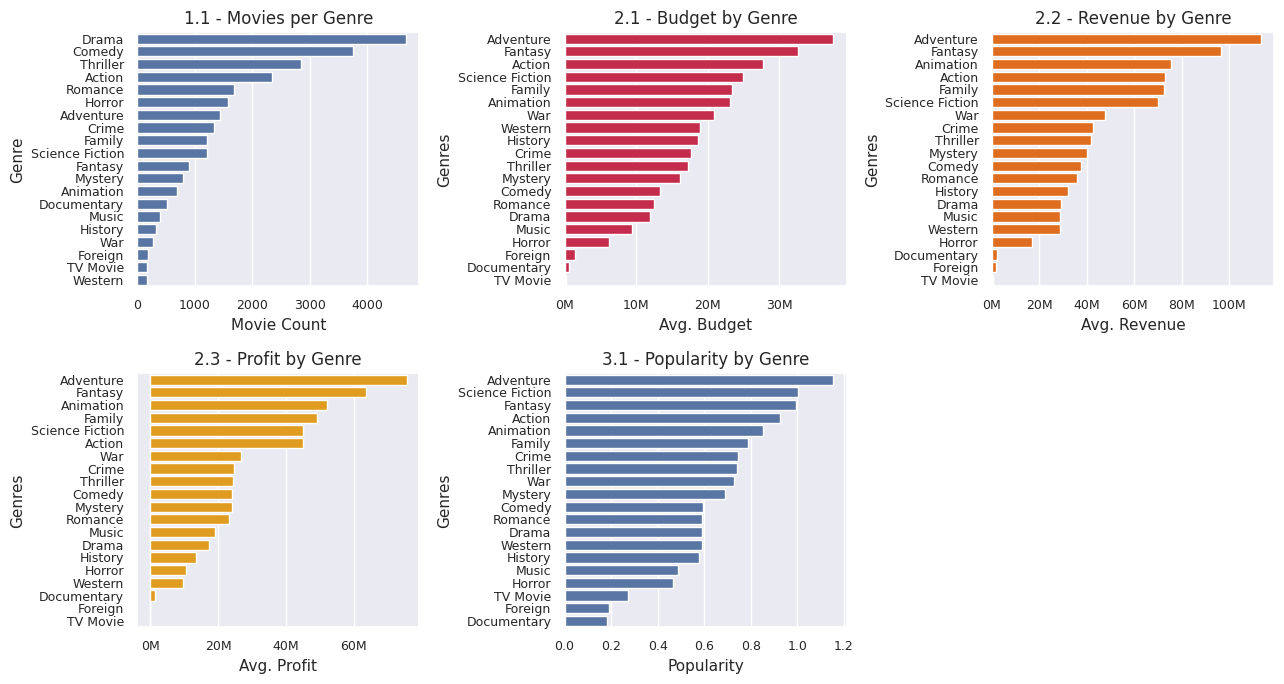

In [ ]:
# Displaying plots to answer Research Questions 1-3

# Financial formatting function
def financial_formatting(x, pos):
    return f'{int(x / 1_000_000)}M'

fig, axs = plt.subplots(2, 3, figsize=(13, 7))

# 1.1 Movies per Genre
genres_split_count = pd.DataFrame(movies_genre_split.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending=False)
sns.barplot(data=genres_split_count, x='original_title', y=genres_split_count.index, ax=axs[0, 0])
axs[0, 0].set_title('1.1 - Movies per Genre', fontsize=12)
axs[0, 0].set_xlabel('Movie Count', fontsize=11)
axs[0, 0].set_ylabel('Genre', fontsize=11)
axs[0, 0].tick_params(axis='x', labelsize=9)
axs[0, 0].tick_params(axis='y', labelsize=9)

# 2.1 Budget by Genre
genres_mean = movies_genre_split.groupby('genres_split').mean(numeric_only=True).sort_values('budget', ascending=False)
sns.barplot(data=genres_mean, x='budget', y=genres_mean.index, ax=axs[0, 1], color = '#DC143C')
axs[0, 1].set_title('2.1 - Budget by Genre', fontsize=12)
axs[0, 1].set_xlabel('Avg. Budget', fontsize=11)
axs[0, 1].set_ylabel('Genres', fontsize=11)
axs[0, 1].tick_params(axis='x', labelsize=9)
axs[0, 1].tick_params(axis='y', labelsize=9)
axs[0, 1].xaxis.set_major_formatter(FuncFormatter(financial_formatting))

# 2.2 Revenue by Genre
genres_mean = genres_mean.sort_values('revenue', ascending=False)
sns.barplot(data=genres_mean, x='revenue', y=genres_mean.index, ax=axs[0, 2], color = '#FF6700')
axs[0, 2].set_title('2.2 - Revenue by Genre', fontsize=12)
axs[0, 2].set_xlabel('Avg. Revenue', fontsize=11)
axs[0, 2].set_ylabel('Genres', fontsize=11)
axs[0, 2].tick_params(axis='x', labelsize=9)
axs[0, 2].tick_params(axis='y', labelsize=9)
axs[0, 2].xaxis.set_major_formatter(FuncFormatter(financial_formatting))

# 2.3 Profit by Genre
genres_mean = genres_mean.sort_values('profit', ascending=False)
sns.barplot(data=genres_mean, x='profit', y=genres_mean.index, ax=axs[1, 0], color = '#FFA500')
axs[1, 0].set_title('2.3 - Profit by Genre', fontsize=12)
axs[1, 0].set_xlabel('Avg. Profit', fontsize=11)
axs[1, 0].set_ylabel('Genres', fontsize=11)
axs[1, 0].tick_params(axis='x', labelsize=9)
axs[1, 0].tick_params(axis='y', labelsize=9)
axs[1, 0].xaxis.set_major_formatter(FuncFormatter(financial_formatting))

# 3.1 Popularity by Genre
genres_mean = genres_mean.sort_values('popularity', ascending=False)
sns.barplot(data=genres_mean, x='popularity', y=genres_mean.index, ax=axs[1, 1])
axs[1, 1].set_title('3.1 - Popularity by Genre', fontsize=12)
axs[1, 1].set_xlabel('Popularity', fontsize=11)
axs[1, 1].set_ylabel('Genres', fontsize=11)
axs[1, 1].tick_params(axis='x', labelsize=9)
axs[1, 1].tick_params(axis='y', labelsize=9)

axs[1, 2].axis('off')
plt.tight_layout()
plt.show()

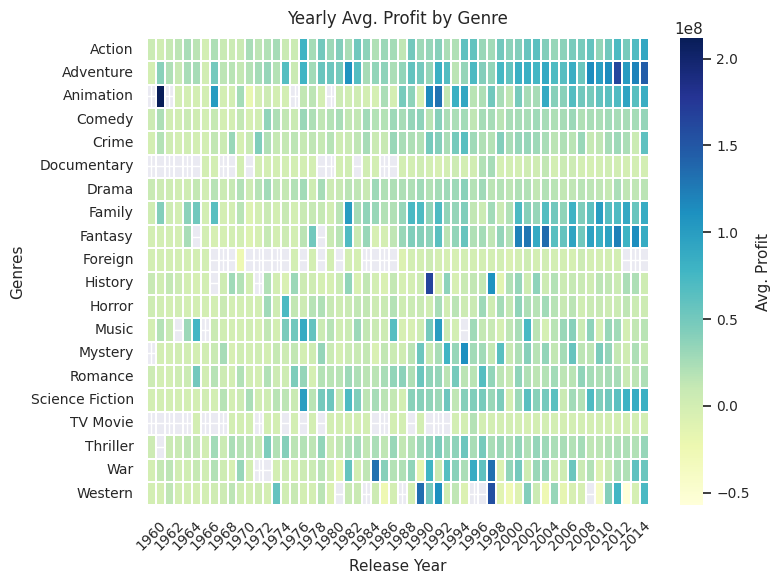

In [ ]:
# Displaying heatmap to visualize average profit trends by genre across release years

time_genre = pd.DataFrame(movies_genre_split.groupby(['release_year', 'genres_split'])['profit'].mean())
final_genre = pd.pivot_table(time_genre, values='profit', index='genres_split', columns='release_year')

sns.set(rc={'figure.figsize': (8, 6)})
sns.set_style('darkgrid')

ax = sns.heatmap(final_genre, cmap='YlGnBu', linewidths=0.25, annot=False)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Avg. Profit', size=11)

plt.title('Yearly Avg. Profit by Genre', fontsize=12, pad=10)
plt.xlabel('Release Year', fontsize=11)
plt.ylabel('Genres', fontsize=11)

plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

### 4. Research Hypotheses
1. Popular movies result in higher profit and revenue.
2. Larger budgets lead to higher revenue and profit.
3. Larger budgets are associated with greater popularity.

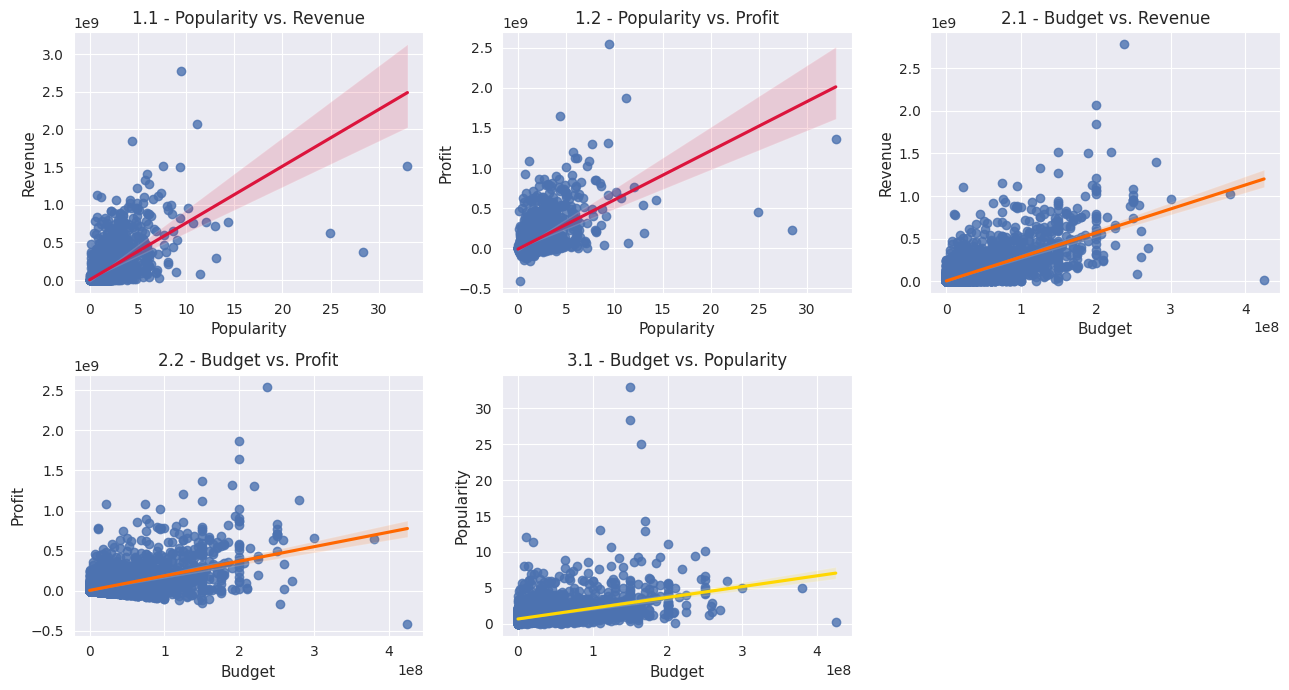

In [ ]:
# Displaying plots to answer Research Hypotheses 1-3

movies_counted = movies_clean[movies_clean['vote_count'] >= 50]
movies_counted = movies_counted.select_dtypes(include=['number'])

fig, axs = plt.subplots(2, 3, figsize=(13, 7))

# 1.1 - Popularity vs. Revenue
sns.regplot(x='popularity', y='revenue', data=movies_counted, line_kws={"color": '#DC143C'}, ax=axs[0, 0])
axs[0, 0].set_title('1.1 - Popularity vs. Revenue', fontsize=12)
axs[0, 0].set_xlabel('Popularity', fontsize=11)
axs[0, 0].set_ylabel('Revenue', fontsize=11)

# 1.2 - Popularity vs. Profit
sns.regplot(x='popularity', y='profit', data=movies_counted, line_kws={"color": '#DC143C'}, ax=axs[0, 1])
axs[0, 1].set_title('1.2 - Popularity vs. Profit', fontsize=12)
axs[0, 1].set_xlabel('Popularity', fontsize=11)
axs[0, 1].set_ylabel('Profit', fontsize=11)

# 2.1 - Budget vs. Revenue
sns.regplot(x='budget', y='revenue', data=movies_counted, line_kws={"color": '#FF6700'}, ax=axs[0, 2])
axs[0, 2].set_title('2.1 - Budget vs. Revenue', fontsize=12)
axs[0, 2].set_xlabel('Budget', fontsize=11)
axs[0, 2].set_ylabel('Revenue', fontsize=11)

# 2.2 - Budget vs. Profit
sns.regplot(x='budget', y='profit', data=movies_counted, line_kws={"color": '#FF6700'}, ax=axs[1, 0])
axs[1, 0].set_title('2.2 - Budget vs. Profit', fontsize=12)
axs[1, 0].set_xlabel('Budget', fontsize=11)
axs[1, 0].set_ylabel('Profit', fontsize=11)

# 3.1 - Budget vs. Popularity
sns.regplot(x='budget', y='popularity', data=movies_counted, line_kws={"color": '#FFD700'}, ax=axs[1, 1])
axs[1, 1].set_title('3.1 - Budget vs. Popularity', fontsize=12)
axs[1, 1].set_xlabel('Budget', fontsize=11)
axs[1, 1].set_ylabel('Popularity', fontsize=11)

axs[1, 2].axis('off')
plt.tight_layout()
plt.show()

# Notes:
  # Most movies have low votes (median = 38)
  # Setting 50 vote threshold ensures focus on movies with enough votes for reliable insights

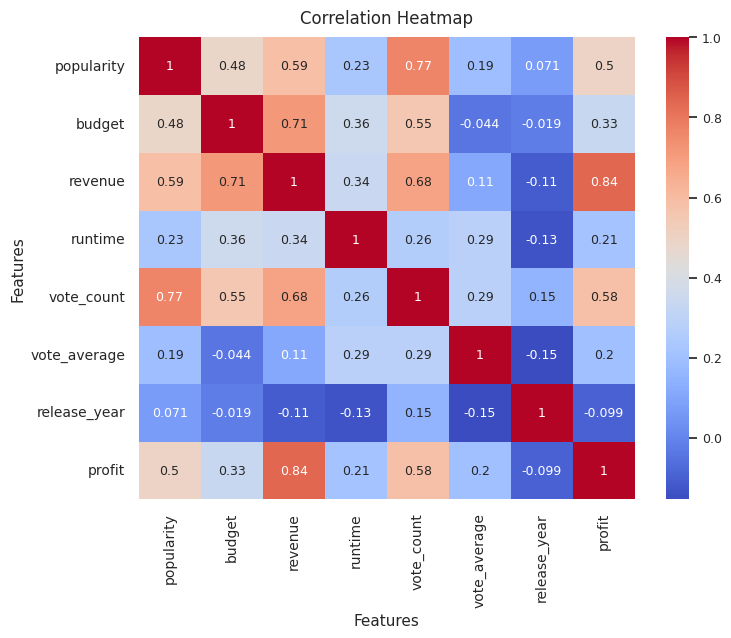

In [ ]:
# Displaying a Spearman correlation heatmap to show relationships

plt.figure(figsize=(8, 6))

movies_correlation = movies_counted.corr(method='spearman')

ax = sns.heatmap(movies_correlation, annot=True, cmap='coolwarm', annot_kws={'size': 9})

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=9)

plt.title('Correlation Heatmap', fontsize=12, pad=10)
plt.xlabel('Features', fontsize=11)
plt.ylabel('Features', fontsize=11)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# Notes:
  # Picked Spearman as it handles outliers well
  # Describe output shows extreme values (e.g. Revenue: Max 2.78B & Median: 0)

## 5. Closing Analysis
1. **Research Insights**:
  - **Common Genres**: Drama, Comedy, and Thriller dominate production, reflecting audience preferences for storytelling and entertainment
  - **Financial Trends**: Adventure, Fantasy, Action, and Animation have the highest budgets, revenues, and profits, highlighting their box office strength
  - **Popularity**: Adventure, Science Fiction, and Fantasy are considered the most popular genres, driven by strong audience appeal

2. **Hypotheses Validation**:
  - Popular movies consistently generate higher profits and revenues
  - Larger budgets continuously drive higher revenue and profit
  - Budgets positively influence popularity

3. **Profitability Trends Over Time**:
  - **Thriving Genres**:
    - **Adventure**: Consistently high profits over the years, driven by blockbuster franchises
    - **Fantasy**: High growth in profitability, particularly in recent years
  - **Struggling Genres**:
    - **Documentary**: Low profitability across most years
    - **TV Movie**: Minimal profits, often underperforming compared to other genres
  - **Mixed Trends**:
    - **Music**: Fluctuates with peaks tied to specific popular releases
    - **History**: Shows sporadic profit spikes but lacks sustained success